<a href="https://colab.research.google.com/github/hgo641/ai_assignments/blob/main/Face_Emotions_Classification_Sample_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

In [2]:
# connect your google drive to access data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
fer2013_dataset_file_path = 'drive/My Drive/ai5/fer2013.csv'

In [4]:
train_images = []
train_labels = []

val_images = []
val_labels = []

test_images = []
test_labels = []

with open(fer2013_dataset_file_path) as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  for row_id, row in enumerate(csv_reader):
    if row_id == 0:
      continue
    label = np.zeros(7)
    label[int(row[0])] = 1

    image = list(map(int, row[1].split(' ')))
    
    if row[2] == 'Training':
      train_labels.append(label)
      train_images.append(image)
    elif row[2] == 'PublicTest':
      test_labels.append(label)
      test_images.append(image)
    elif row[2] == 'PrivateTest':
      val_labels.append(label)
      val_images.append(image)

train_labels = np.asarray(train_labels, dtype=np.float32)
train_images = np.asarray(train_images, dtype=np.float32).reshape(-1, 48, 48, 1)

val_labels = np.asarray(val_labels, dtype=np.float32)
val_images = np.asarray(val_images, dtype=np.float32).reshape(-1, 48, 48, 1)

test_labels = np.asarray(test_labels, dtype=np.float32)
test_images = np.asarray(test_images, dtype=np.float32).reshape(-1, 48, 48, 1)


In [5]:
print('Train images:', train_images.shape)
print('Train labels:', train_labels.shape)

print('Val images:', val_images.shape)
print('Val labels:', val_labels.shape)

print('Test images:', test_images.shape)
print('Test labels:', test_labels.shape)

Train images: (28709, 48, 48, 1)
Train labels: (28709, 7)
Val images: (3589, 48, 48, 1)
Val labels: (3589, 7)
Test images: (3589, 48, 48, 1)
Test labels: (3589, 7)


In [6]:
# normalization
train_images /= 255
val_images /= 255
test_images /= 255

# Print Data Instance

In [7]:
emotions = {
    0: 'Angry', 
    1: 'Disgust',
    2: 'Fear', 
    3: 'Happy',
    4: 'Sad', 
    5: 'Surprise', 
    6: 'Neutral'
}

Label array: [0. 0. 1. 0. 0. 0. 0.] 
Label: 2 
Emotion: Fear 
Image shape: (48, 48, 1)


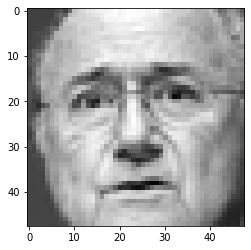

In [8]:
index = 5
print('Label array:', train_labels[index], '\nLabel:', np.argmax(train_labels[index]),
      '\nEmotion:', emotions[np.argmax(train_labels[index])],
      '\nImage shape:', train_images[index].shape)
plt.imshow(train_images[index].reshape(48, 48), cmap='gray')
plt.show()

# Prepare Model

In [13]:
from tensorflow.keras.layers import AveragePooling2D
from keras.initializers import  RandomNormal
input_shape = (48, 48, 1)
num_labels = 7

num_features = 64

model = Sequential()

# layer 7개로 증가시킴
# 커널 개수 128개로 증가시킴

# 1st convolution layer
model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same', input_shape=input_shape, bias_initializer=RandomNormal(stddev=1), kernel_initializer=RandomNormal(stddev=1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same', input_shape=input_shape, bias_initializer=RandomNormal(stddev=1), kernel_initializer=RandomNormal(stddev=1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(Dropout(0.25))

# 3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same', bias_initializer=RandomNormal(stddev=1), kernel_initializer=RandomNormal(stddev=1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same', bias_initializer=RandomNormal(stddev=1), kernel_initializer=RandomNormal(stddev=1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(Dropout(0.25))
          
# 5th convolution layer
model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same', bias_initializer=RandomNormal(stddev=1), kernel_initializer=RandomNormal(stddev=1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same', bias_initializer=RandomNormal(stddev=1), kernel_initializer=RandomNormal(stddev=1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(Dropout(0.25))

# 7th convolution layer
model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same', bias_initializer=RandomNormal(stddev=1), kernel_initializer=RandomNormal(stddev=1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same', bias_initializer=RandomNormal(stddev=1), kernel_initializer=RandomNormal(stddev=1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())
# Fully connected layers
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation='softmax'))


model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 48, 48, 128)       1280      
                                                                 
 conv2d_17 (Conv2D)          (None, 48, 48, 128)       147584    
                                                                 
 batch_normalization_8 (Batc  (None, 48, 48, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 128)      0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 23, 23, 128)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 23, 23, 128)      

In [14]:
batch_size = 512
# epochs 100으로 증가
epochs = 100

#Compliling the model with adam optimixer and categorical crossentropy loss
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

#training the model
train_history = model.fit(
    train_images, train_labels, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_data=(val_images, val_labels), 
    verbose=1)

Epoch 1/100
57/57 [==============================] - 30s 422ms/step - loss: 2.6082 - accuracy: 0.2017 - val_loss: 1.8567 - val_accuracy: 0.1889
Epoch 2/100
57/57 [==============================] - 22s 384ms/step - loss: 1.8381 - accuracy: 0.2345 - val_loss: 1.8494 - val_accuracy: 0.2285
Epoch 3/100
57/57 [==============================] - 21s 373ms/step - loss: 1.8133 - accuracy: 0.2438 - val_loss: 1.7935 - val_accuracy: 0.2566
Epoch 4/100
57/57 [==============================] - 21s 370ms/step - loss: 1.7934 - accuracy: 0.2520 - val_loss: 1.7750 - val_accuracy: 0.2669
Epoch 5/100
57/57 [==============================] - 21s 375ms/step - loss: 1.7885 - accuracy: 0.2515 - val_loss: 1.8136 - val_accuracy: 0.2722
Epoch 6/100
57/57 [==============================] - 21s 376ms/step - loss: 1.7744 - accuracy: 0.2613 - val_loss: 1.8011 - val_accuracy: 0.2728
Epoch 7/100
57/57 [==============================] - 21s 375ms/step - loss: 1.7627 - accuracy: 0.2729 - val_loss: 1.8192 - val_accuracy:

In [15]:
loss, accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Loss:', loss, '\nAccuracy:', accuracy * 100, '%')

113/113 [==============================] - 1s 9ms/step - loss: 1.1304 - accuracy: 0.6021
Loss: 1.130395531654358 
Accuracy: 60.21175980567932 %
